# co-citation network (공동인용분석)
### 필요한 패키지

In [18]:
library(bibliometrix)
library(igraph)
library(dplyr)

## 데이터 불러오기
### AHRQ파일에 총 96개의 articles가 있고 1939개의 references가 인용되었다
### cocMatrix는 bipartite matrix로 만들어준다(96* 1939 matrix)

In [19]:

D<-readFiles("C://Users/admin/Desktop/final.ahrq.txt")
M <- convert2df(D, dbsource="isi",format="plaintext")

cr<-cocMatrix(M,Field = "CR",sep =";")
dim(cr)


Converting your isi collection into a bibliographic dataframe

Articles extracted   96 
Done!


Generating affiliation field tag AU_UN from C1:  Done!



[1]   96 1939

### biblioNetwork함수는 바로 co-citation matrix로 만들어준다

In [8]:

z<-biblioNetwork(M,analysis ="co-citation",network = "references")
g1<-graph.adjacency(z,mode="undirected",weighted = T)

## 전처리

### 전처리 전

In [ ]:

A<-as.matrix(cr)
name<-dimnames(A)[[2]]
name[1:10]


In [9]:


for(i in 1:length(name)){
  
  tmp<-strsplit(name[i],' ')[[1]]
  tmp[1]<-tolower(tmp[1])
  ttmp<-strsplit(tmp[1],'')[[1]]
  ttmp[1]<-toupper(ttmp[1])
    tmp[1]<-paste(ttmp,collapse = "")
  
  ind<-grep("\\d",tmp)
  
  tmp[ind]<-paste0(tmp[ind],",")
  tmp[ind-1]<-paste0(tmp[ind-1],",")
  name[i]<-paste(tmp,collapse=" ")
}

dimnames(A)[[2]]<-name

h<-data.frame(colSums(A))
h$name<-name

[1] "ACKERMAN DB 2010 J ARTHROPLASTY "     
 [2] "ALEXANDER BH 1992 AM J PUBLIC HEALTH "
 [3] "AZHAR A 2008 IR MED J "               
 [4] "BARRETT JA 2004 J AM GERIATR SOC "    
 [5] "BASS E 2008 J AM MED DIR ASSOC "      
 [6] "BATES DW 1995 AM J MED "              
 [7] "CANNARD G 1996 NURS TIMES "           
 [8] "CHANG JT 2004 BRIT MED J "            
 [9] "CHAPUY MC 1992 NEW ENGL J MED "       
[10] "COTTER PE 2006 IRISH J MED SCI "

### 전처리 후

In [10]:
name[1:10]


[1] "Ackerman DB, 2010, J ARTHROPLASTY"     
 [2] "Alexander BH, 1992, AM J PUBLIC HEALTH"
 [3] "Azhar A, 2008, IR MED J"               
 [4] "Barrett JA, 2004, J AM GERIATR SOC"    
 [5] "Bass E, 2008, J AM MED DIR ASSOC"      
 [6] "Bates DW, 1995, AM J MED"              
 [7] "Cannard G, 1996, NURS TIMES"           
 [8] "Chang JT, 2004, BRIT MED J"            
 [9] "Chapuy MC, 1992, NEW ENGL J MED"       
[10] "Cotter PE, 2006, IRISH J MED SCI"

## Centrality and igraph
###  bipartite matrix A를 T(A) * A 하면 co-citation matrix가 된다

In [20]:

co.rf<-t(A) %*% A
co.rf.g<-graph.adjacency(co.rf,mode = "undirected",weighted = T)



### 각 node의 degree를 기준으로 30개의 node만 그리려고 한다
### degree가 아니더라도 다른 통계량을 사용해도 된다(맞게)

In [21]:

deg.rf<-degree(co.rf.g)
deg.rf2<-as.data.frame(deg.rf)
deg.rf2$name<-name
deg.rf3<-arrange(deg.rf2,desc(deg.rf2$deg))
deg.rf3[1:31,]

#Top30 nodes(references) by degree from the total data

e1<-eigen_centrality(co.rf.g)[1]
e11<-data.frame(e1)

b1<-betweenness(co.rf.g)
b11<-data.frame(b1)


d1<-degree(co.rf.g)
d11<-data.frame(d1)


dc1<-d11/(dim(d11)[1]-1) 

cen<-cbind.data.frame(e11,b11,d11)
cen$name<-name
names(cen)<-c("eigen_cen","betweenness","degree_cen","name")

head(cen)

deg.rf,name
593,"Oliver D, 1997, BMJ-BRIT MED J"
540,"Oliver D, 2004, AGE AGEING"
520,"Oliver D, 2000, J AM GERIATR SOC"
430,"Bates DW, 1995, AM J MED"
403,"Lundebjerg N, 2001, J AM GERIATR SOC"
363,"Halfon P, 2001, J CLIN EPIDEMIOL"
340,"Hitcho EB, 2004, J GEN INTERN MED"
339,"Perell KL, 2001, J GERONTOL A-BIOL"
338,"Tideiksaar R, 1993, MT SINAI J MED"
337,"Haines TP, 2004, BMJ-BRIT MED J"


eigen_cen,betweenness,degree_cen,name
0.04409063,21.20258,31,"Ackerman DB, 2010, J ARTHROPLASTY"
0.13552728,494.32959,90,"Alexander BH, 1992, AM J PUBLIC HEALTH"
0.04409063,21.20258,31,"Azhar A, 2008, IR MED J"
0.17248824,729.78926,90,"Barrett JA, 2004, J AM GERIATR SOC"
0.04409063,21.20258,31,"Bass E, 2008, J AM MED DIR ASSOC"
0.70902555,62733.97012,430,"Bates DW, 1995, AM J MED"


In [22]:

E(co.rf.g)$width = E(co.rf.g)$weight
V(co.rf.g)$size<-deg.rf


In [23]:

induce<-induced.subgraph(co.rf.g,V(co.rf.g)$size >=207)

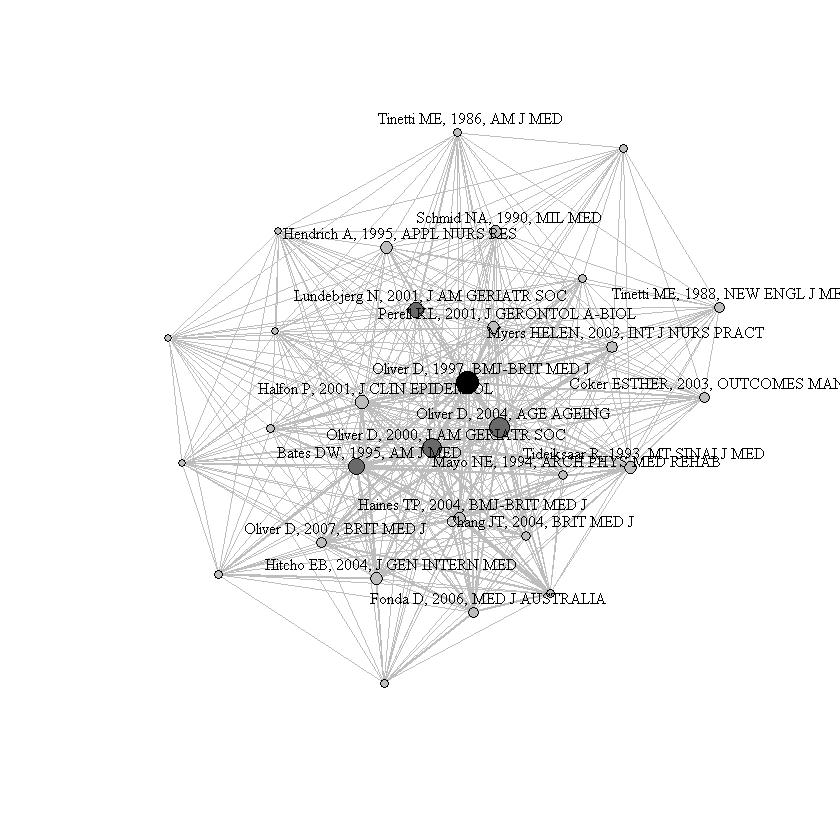

In [14]:

V(induce)$initial<-ifelse(V(induce)$size>=240,V(induce)$name,"")
g2<-simplify(induce,remove.loops=TRUE,remove.multiple = T)

V(g2)$color<-ifelse(V(g2)$size>=593,"black",
                    ifelse(V(g2)$size>=403,"Dim gray","Gray"))

V(g2)$initial2<-" "
set.seed(12)
plot(g2,layout=layout.fruchterman.reingold, vertex.color=V(g2)$color, vertex.size=V(g2)$size/70, vertex.label.color="black",
     vertex.label.cex=0.8, vertex.label.dist=1, edge.curved=0,edge.width=E(g2)$weight/3,edge.color="gray",vertex.label=V(g2)$initial)

## Community detection

In [24]:
eig<-leading.eigenvector.community(co.rf.g)
lou<-cluster_louvain(co.rf.g)

V(co.rf.g)$lou<-lou$membership
V(co.rf.g)$eig<-eig$membership
